# Machine Learning -  Linear Regression in Python
<a id="top"></a>

Notes on implementing Linear Regression in python.

### 1. [Data Analysis](#0)

### 2. [Simple Linear Regression](#0)
* [`Gradient Descent` Python Implementation](#1)
* [Manual Method: Compute `Slope and Intercept`](#5)
* [`Scikit-Learn` Implementation](#3)

* [Solving with `Normal Equation`](#10)




Importing needed libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Generation of dataset



In [2]:
# generated data
data_x = np.linspace(1.0, 10.0, 100)[:, np.newaxis]
data_y = np.sin(data_x) + 0.1*np.power(data_x,2) + 0.5*np.random.randn(100,1)
data_x /= np.max(data_x)
X = data_x
Y = data_y
print(X.shape,Y.shape)

(100, 1) (100, 1)


<a id = '0'></a>
# 1. Data Analysis
[Top](#top)

## Basic data info


__We can even visualize the data above__
__We first start by creating our `x` and `y` variables. Then plotting to gain
an intuition on how the data looks like.__

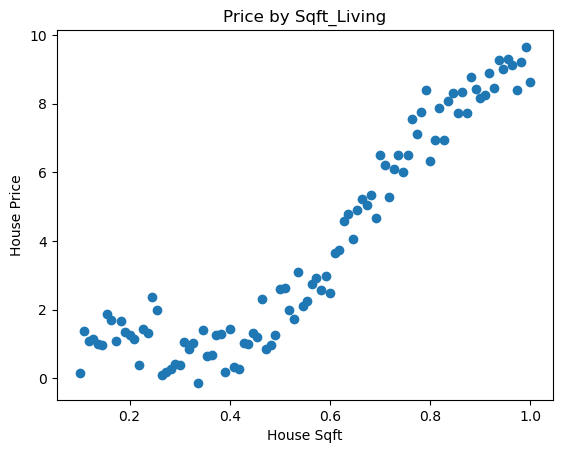

In [3]:
plt.xlabel('House Sqft')  # x-axis  label
plt.ylabel('House Price')  # y-acis label
plt.title('Price by Sqft_Living')  # title of plot
plt.scatter(X,Y)  # scatter plot

<a id="0"></a>
# <font color="red">Simple </font>Linear Regression

We will start with __Simple Linear Regression__ since it is easier to understand and visualize. Simple Linear Regression is easier to plot and visualize so we will start with that.

It is __Simple Linear Regression__ when we have one dependent variable (feature) `y` and one independent variable `x`.

Our goal is to estimate $\hat{y} = x {\theta_1} + \theta_0$, where $\theta_1$ is our coefficient and $\theta_0$ is our `Y` intercept. To estimate $\hat{y}$ we need to find a function such as $\hat{y} = h(x) = x {\theta_1} + \theta_0$

<a id='1'></a>
## 1. Manual Method : Gradient Descent Implementation

## Equations
Objective of Linear Regression is to minimize the cost function:
<br>
$\Large J(\theta) = \frac{1}{2n} \sum\limits_{i=1}^{n} (h_\theta(x^{(i)})-y^{(i)})^2$
<br>
<br>
where the hypothesis $h_\theta(x)$ is given by the lienar model:  

$\Large h_\theta(x) = \theta^T X = \theta_1 X_1 + \theta_0 $  
<br>
In batch gradient descent, each iteration performs the update:  
$\Large \theta_j := \theta_j - \alpha \frac{1}{n} \sum\limits_{i=1}^{n}(h_\theta (x^{(i)}) - y^{(i)})x_j^{(i)}$


In [4]:
x = X
y = Y

In [7]:
xg = x.reshape(-1,1)
yg = y.reshape(-1,1)
x_0 = np.ones(len(x)).reshape(-1,1)  # x0 is set to 1

xg = np.concatenate((x_0, x.reshape(-1,1)), axis=1)
print(xg.shape,yg.shape)

(100, 2) (100, 1)


#### Implementing the Cost Function $J(\theta)$ in python

In [6]:
def computeCost(x, y, theta):
    n = len(y)
    h_x = x.dot(theta)
    j = np.sum(np.square(h_x - y))*(1/(2*n))
    return j

In [8]:
def gradientDescent(x, y, theta, alpha, iteration):
    print('Running Gradient Descent...')
    j_hist = []
    m = len(y)
    for i in range(iteration):
        j_hist.append(computeCost(x, y, theta))
        print("iteratiions {}  loss {} ".format(i, j_hist[-1]))
        h_x = x.dot(theta)
        theta = theta - ((alpha/m) *((np.dot(x.T, (h_x-y) ))))
        theta = theta - ((alpha/m) *((x.T @ (h_x-y) )))
    return theta, j_hist

In [9]:
theta = np.zeros((2,1))  # initial values of theta set to 0
iteration = 2000  # number of loop iterations for convergence
alpha = 0.5  # learning rate

theta, cost = gradientDescent(xg, yg, theta, alpha, iteration)
print('Theta found by Gradient Descent: slope = {} and intercept {}'.format(theta[1], theta[0]))

Running Gradient Descent...
iteratiions 0  loss 12.370296791155877 
iteratiions 1  loss 4.237285847799736 
iteratiions 2  loss 3.171128639968054 
iteratiions 3  loss 2.8489969354830618 
iteratiions 4  loss 2.6243661105911658 
iteratiions 5  loss 2.42917109031269 
iteratiions 6  loss 2.2544953414848448 
iteratiions 7  loss 2.0976490729440207 
iteratiions 8  loss 1.9567579179847183 
iteratiions 9  loss 1.8301932983247668 
iteratiions 10  loss 1.7164978528168475 
iteratiions 11  loss 1.6143629777203519 
iteratiions 12  loss 1.522613186586853 
iteratiions 13  loss 1.4401925224783318 
iteratiions 14  loss 1.3661523988578612 
iteratiions 15  loss 1.2996406816138975 
iteratiions 16  loss 1.2398918817136673 
iteratiions 17  loss 1.186218345118189 
iteratiions 18  loss 1.138002338512582 
iteratiions 19  loss 1.0946889397605462 
iteratiions 20  loss 1.055779651258111 
iteratiions 21  loss 1.0208266626821554 
iteratiions 22  loss 0.9894276971031671 
iteratiions 23  loss 0.9612213811457183 
iterat

**Plotting the linear fit**

In [10]:
print(theta, theta.shape)

[[-2.17696626]
 [10.99716899]] (2, 1)


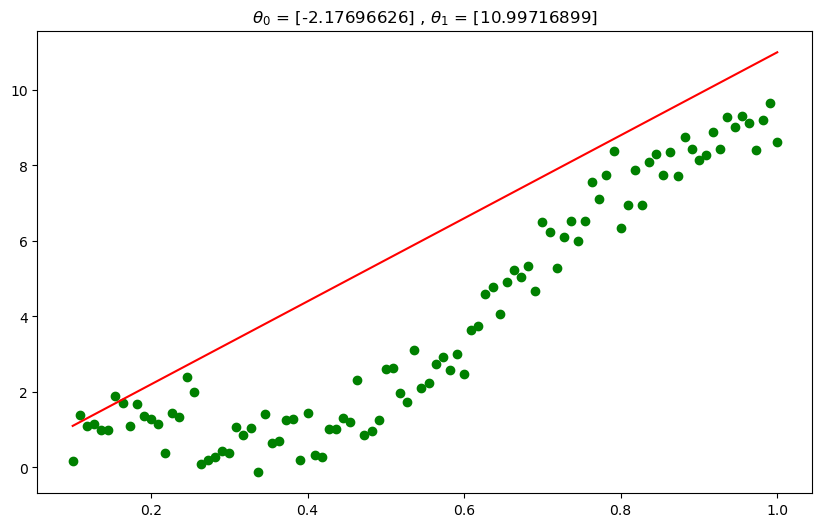

In [11]:
plt.figure(figsize=(10,6))
plt.title('$\\theta_0$ = {} , $\\theta_1$ = {}'.format(theta[0], theta[1]))
plt.scatter(x,y, marker='o', color='g')
predicted = np.dot(x, theta.T)
plt.plot(data_x,predicted[:,1], color='r')
plt.show()

Text(0, 0.5, 'Cost')

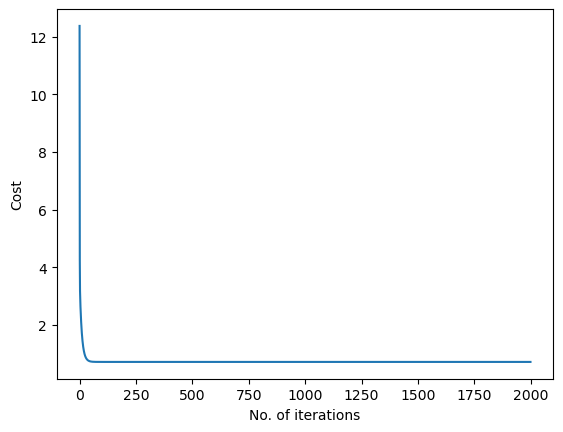

In [12]:
plt.plot(cost)
plt.xlabel('No. of iterations')
plt.ylabel('Cost')

## 2. Manual Method: Compute Slope and Intercept using a Formula (Gradient = 0)

## Slope  $a = \frac{\sum (x_i-\bar{x})(y_i-\bar{Y})}{\sum (x_i-\bar{x})^2}$

## Intercept $b = \bar{y}-a\bar{x}$


In [13]:
def slr(X, Y):
    mean_x = X.mean()
    mean_y = Y.mean()

    delta_x = X - mean_x
    delta_y = Y - mean_y

    slope = (delta_x * delta_y).sum()/(delta_x**2).sum()
    intercept = mean_y - slope*mean_x

    return (slope, intercept)

In [14]:
xf = x.reshape(-1,1)
yf = y.reshape(-1,1)

slope, intercept = slr(xf, yf)
print('Slope = {} and Intercept = {}'.format(slope, intercept))
print('y = x({}) + {}'.format(slope, intercept))

Slope = 10.99716899056708 and Intercept = -2.1769662609135154
y = x(10.99716899056708) + -2.1769662609135154


#### Plot the linear fit using the slop and intercept values

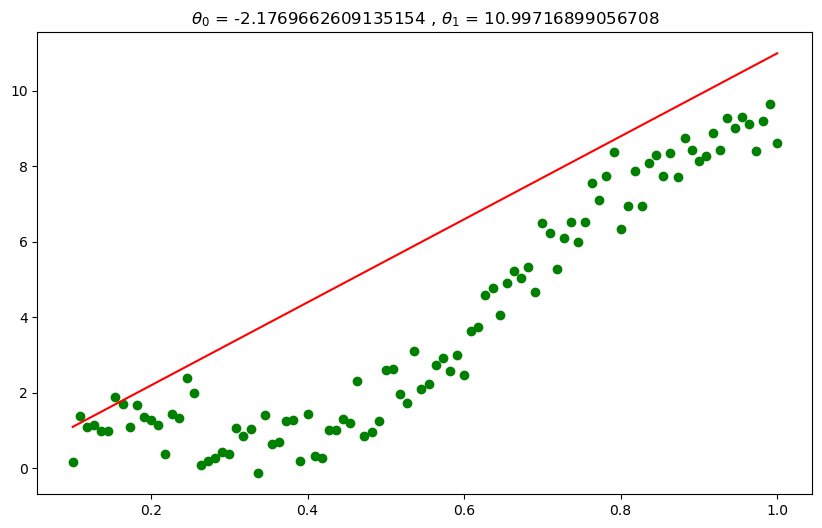

In [15]:
plt.figure(figsize=(10,6))
plt.title('$\\theta_0$ = {} , $\\theta_1$ = {}'.format(intercept, slope))
plt.scatter(X,Y, marker='o', color='green')
plt.plot(X, np.dot(x, slope), 'r')

<a id='3'></a>
## 3. Implement using Scikit-Learn

In [37]:
xsl = x.reshape(-1,1)
ysl = y.reshape(-1,1)
xsl = np.concatenate((np.ones(len(xsl)).reshape(-1,1), xsl), axis=1)

from sklearn.linear_model import LinearRegression

slr = LinearRegression()
slr.fit(xsl[:,1].reshape(-1,1), ysl.reshape(-1,1))
y_hat = slr.predict(xsl[:,1].reshape(-1,1))

print('theta[0] = ', slr.intercept_)
print('theta[1] = ', slr.coef_)

thetas = np.array((slr.intercept_, slr.coef_[0])) # .squeeze()

theta[0] =  [-2.17696626]
theta[1] =  [[10.99716899]]


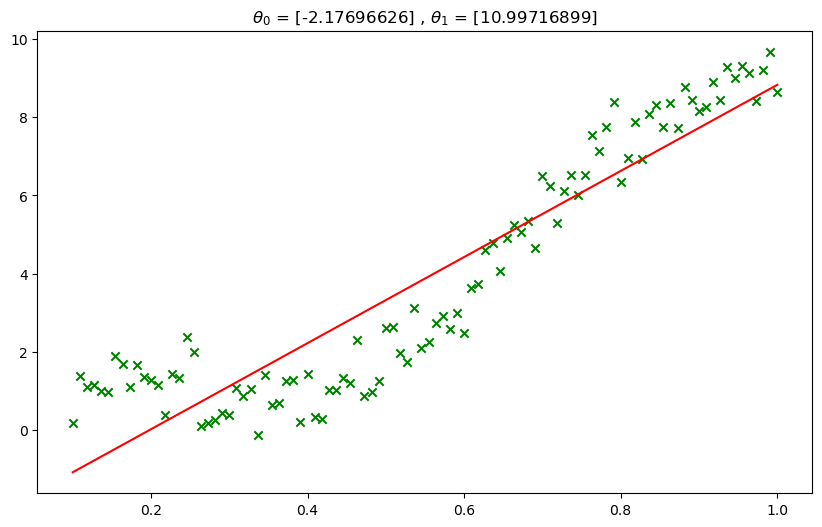

In [21]:
plt.figure(figsize=(10,6))
plt.title('$\\theta_0$ = {} , $\\theta_1$ = {}'.format(thetas[0], thetas[1]))
plt.scatter(xsl[:,1],y, marker='x', color='g')
plt.plot(xsl[:,1], np.dot(xsl, thetas), 'r')

<a id='10'></a>
## 4. Solving with Normal Equation
Closed form Solution $\hat{\theta} = (X^TX)^{-1} X^TY$

In [22]:
x_neq = np.concatenate((np.ones(len(X)).reshape(-1,1), X.reshape(-1,1)), axis=1)
a = np.linalg.inv(np.dot(x_neq.T, x_neq))
b = np.dot(x_neq.T, y)
theta_neq = np.dot(a,b)

In [24]:
print(theta_neq)

[[-2.17696626]
 [10.99716899]]


Code adapted from [github](https://github.com/tatwan/Linear-Regression-Implementation-in-Python)